In [1]:
import sys
#sys.path.append("C:/Users/Surface/Documents/repos/playground")
sys.path.append("/home/peterhacker/Documents/phRepo/playground")

from Oceanmodel.policy_ve import *
from Oceanmodel.stateupdates_ve import *
from Oceanmodel.engine import *


In [2]:
MONTE_CARLO_RUNS = 1
sim_length = 832 #CHANGE IN behavior_ve.py too!!!

In [3]:
system_params

{'minlock_amt': [10000.0],
 'maxlock_amt': [5000000.0],
 'lock_dur': [0.0],
 'minlock_dur': [1],
 'maxlock_dur': [208],
 'min_weekly_dcv_amt': [100],
 'max_weekly_dcv_amt': [1000],
 'weekly_lock_prob': [0.0],
 'weekly_vote_success_prob': [0.0],
 'weekly_consume_prob': [1.0],
 'weekly_consume_multiple': [0.0],
 'datafarming_active_share': [0.5],
 'datafarming_max_assets_n': [100],
 'datafarming_weekly_yield_cap': [0.015717],
 'datafarming_apy_cap': [1.25],
 'protocol_revenue_community_share': [0.5],
 'protocol_transaction_fee': [0.001],
 'revenue_burn_pct': [0.5],
 'dcv_growth_rate': [0.1],
 'min_accepted_yield': [{'weekly_yield': 0.0009387127031117437, 'apy': 0.05},
  {'weekly_yield': 0.0014811157920018303, 'apy': 0.08000000000000002},
  {'weekly_yield': 0.0020089385902342105, 'apy': 0.11000000000000003},
  {'weekly_yield': 0.0025229515763818267, 'apy': 0.14000000000000004},
  {'weekly_yield': 0.0030238655474974507, 'apy': 0.17000000000000004}],
 'lock_supply_pct_cap': [0.85]}

In [4]:

#system_params = create_par_sweep(system_params)

del configs[:]

sim_config = config_sim({
    "N": MONTE_CARLO_RUNS,
    "T": range(sim_length),
    "M": system_params
})

#psubs = generate_psubs_all()
#psubs = generate_psubs_LinearLocking_PerfectActivationVotingVolume()
#psubs = generate_psubs_LazyLocking_PerfectActivationVotingVolume()
psubs = generate_psubs_SmartLocking_PerfectActivationVotingVolume()
#psubs = generate_psubs_stoch()


for i in range(len(psubs)):
    experiment.append_configs(
        initial_state = initial_state,
        partial_state_update_blocks = psubs[i],
        sim_configs = sim_config
    )

#experiment.append_configs(
#    initial_state = initial_state,
#    partial_state_update_blocks = psubs[0],
#    sim_configs = sim_config
#)

psub assumptions: Locking: p_lock_3, Voting: p_vote_5, Consumption: p_data_asset_consumed_1
psub assumptions: Locking: p_lock_3, Voting: p_vote_5, Consumption: p_data_asset_consumed_2
psub assumptions: Locking: p_lock_3, Voting: p_vote_5, Consumption: p_data_asset_consumed_3


In [5]:
sim_config

[{'N': 1,
  'T': range(0, 832),
  'M': {'minlock_amt': 10000.0,
   'maxlock_amt': 5000000.0,
   'lock_dur': 0.0,
   'minlock_dur': 1,
   'maxlock_dur': 208,
   'min_weekly_dcv_amt': 100,
   'max_weekly_dcv_amt': 1000,
   'weekly_lock_prob': 0.0,
   'weekly_vote_success_prob': 0.0,
   'weekly_consume_prob': 1.0,
   'weekly_consume_multiple': 0.0,
   'datafarming_active_share': 0.5,
   'datafarming_max_assets_n': 100,
   'datafarming_weekly_yield_cap': 0.015717,
   'datafarming_apy_cap': 1.25,
   'protocol_revenue_community_share': 0.5,
   'protocol_transaction_fee': 0.001,
   'revenue_burn_pct': 0.5,
   'dcv_growth_rate': 0.1,
   'min_accepted_yield': {'weekly_yield': 0.0009387127031117437, 'apy': 0.05},
   'lock_supply_pct_cap': 0.85},
  'subset_id': 0,
  'subset_window': deque([0, None], maxlen=2),
  'simulation_id': 2,
  'run_id': 0},
 {'N': 1,
  'T': range(0, 832),
  'M': {'minlock_amt': 10000.0,
   'maxlock_amt': 5000000.0,
   'lock_dur': 0.0,
   'minlock_dur': 1,
   'maxlock_dur':

In [6]:
exec_context = ExecutionContext()

simulation = Executor(exec_context=exec_context, configs=configs)

raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 3
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (832, 21, 5, 10)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
SubsetIDs: [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
Ns       : [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
ExpIDs   : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
Execution Mode: parallelized
Total execution time: 774.79s


In [17]:
# Get df
simulation_result = pd.DataFrame(raw_result)
#simulation_result

# save simulation results to csv
simulation_result.to_csv('exploration_sim_2_simulation_result.csv')


In [8]:
simulation_result

,ve_accounts,votes,data_assets,ocean_unlocked_supply,ocean_treasury,rewards_distributed_df_active,rewards_distributed_df_passive,rewards_distributed_fees,rewards_pool_fees,distribution_schedule,simulation,subset,run,substep,timestep
0,{},"{'83f05b94-6daf-44cf-9842-77ed4280e26e': 0.0, ...",{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,4.340268e+08,5.034000e+08,0.0,0.0,0.000000,0.000000,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,0,0
1,{dc96ae3e-527f-49b8-bead-6b78a438333d: veaccou...,"{'83f05b94-6daf-44cf-9842-77ed4280e26e': 0.0, ...",{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,4.233739e+08,5.034000e+08,0.0,0.0,0.000000,25.000000,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,1,1
2,{dc96ae3e-527f-49b8-bead-6b78a438333d: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,4.233739e+08,5.034000e+08,0.0,0.0,0.000000,25.000000,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,2,1
3,{dc96ae3e-527f-49b8-bead-6b78a438333d: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,4.233794e+08,5.033945e+08,500.0,5000.0,25.000000,0.000000,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,3,1
4,{dc96ae3e-527f-49b8-bead-6b78a438333d: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,4.234893e+08,5.033945e+08,500.0,5000.0,25.000000,0.000000,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49930,{828cbf18-f354-4e32-a8b9-f89074564a83: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,6.744280e+08,2.170262e+08,70941.5,70941.5,22685.110396,0.000000,"[[10000], [10000], [10000], [10000], [10000], ...",2,4,5,4,831
49931,{828cbf18-f354-4e32-a8b9-f89074564a83: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,6.734568e+08,2.170262e+08,70941.5,70941.5,22685.110396,22705.730804,"[[10000], [10000], [10000], [10000], [10000], ...",2,4,5,1,832
49932,{828cbf18-f354-4e32-a8b9-f89074564a83: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,6.734568e+08,2.170262e+08,70941.5,70941.5,22685.110396,22705.730804,"[[10000], [10000], [10000], [10000], [10000], ...",2,4,5,2,832
49933,{828cbf18-f354-4e32-a8b9-f89074564a83: veaccou...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': [0.00...,{'83f05b94-6daf-44cf-9842-77ed4280e26e': dataa...,6.736214e+08,2.168843e+08,70941.5,70941.5,22705.730804,0.000000,"[[10000], [10000], [10000], [10000], [10000], ...",2,4,5,3,832


In [9]:
# Analysis and plotting modules
import pandas as pd
import numpy as np
# import plotly
import matplotlib.pyplot as plt

In [10]:
def post_process2(df_raw):
    # df for monte carlo plots
    last_substep = max(df_raw.substep)

    df_p = df_raw.copy()
    df_p = df_p[df_p.substep == last_substep]
    df_p['ve_balance'] = df_p.apply(lambda x: sum([x['ve_accounts'][acct].vebalance for acct in x['ve_accounts'].keys()]), axis=1)
    df_p['locked_supply'] = df_p.apply(lambda x: sum([x['ve_accounts'][acct].locked for acct in x['ve_accounts'].keys()]), axis=1)
    #df_p['lock_duration_sum'] = df_p.groupby('run').apply(lambda x: sum([x['ve_accounts'][acct].lockduration for acct in x['ve_accounts'].keys()]), axis=1)
    #df_p['lock_duration_diff'] = df_p.groupby('run').diff()['lock_duration_sum']
    df_p['active_pct'] = df_p.apply(lambda x: sum([x['votes'][asset] for asset in x['votes'].keys()]), axis=1)
    df_p['pct_locked'] = df_p['locked_supply'] / (df_p['locked_supply'] + df_p['ocean_unlocked_supply'])
    df_p['dcv'] = df_p.apply(lambda x: sum([x['data_assets'][asset].dataconsumevolume for asset in x['data_assets'].keys()]), axis=1)
    df_p['Passive_APY'] = df_p.apply(lambda x: (1 + x['rewards_distributed_df_passive']/x['ve_balance']) ** 52 - 1 if x['ve_balance'] != 0 else 0, axis=1)
    df_p['Active_APY'] = df_p.apply(lambda x: (1 + x['rewards_distributed_df_active']/(x['active_pct']*x['ve_balance'])) ** 52 - 1 if x['ve_balance'] != 0 and x['active_pct'] != 0 else 0, axis=1)
    df_p['Fees_APY'] = df_p.apply(lambda x: (1 + x['rewards_distributed_fees']/x['ve_balance']) ** 52 - 1 if x['ve_balance'] != 0 else 0, axis=1)
    #df_p['Agg_APY'] = df_p.apply(lambda x: (1 + (x['rewards_distributed_df_passive'] + x['rewards_distributed_df_active'] + x['rewards_distributed_fees'])/x['locked_supply']) ** 52 - 1 if x['locked_supply'] != 0 else 0, axis=1)
    #df_p['Agg_APY'] = df_p.apply(lambda x: ((1 + (x['rewards_distributed_df_passive'] + x['rewards_distributed_fees'])/x['locked_supply']) ** 52 - 1) + x['Active_APY']*x['active_pct'] if x['locked_supply'] != 0 else 0, axis=1)
    df_p['Agg_APY'] = df_p.apply(lambda x: (x['Passive_APY'] + x['Fees_APY'] + x['Active_APY']*x['active_pct']), axis=1)

    df_p = df_p[['simulation', 'run', 'subset', 'timestep', 'ocean_treasury', 'ocean_unlocked_supply'
             , 'locked_supply', 'pct_locked', 've_balance', 'active_pct', 'dcv', 'rewards_distributed_df_passive'
             , 'rewards_distributed_df_active', 'rewards_distributed_fees', 'Passive_APY', 'Active_APY', 'Fees_APY'
             , 'Agg_APY']]

    return df_p

In [11]:
df_p = post_process2(simulation_result)

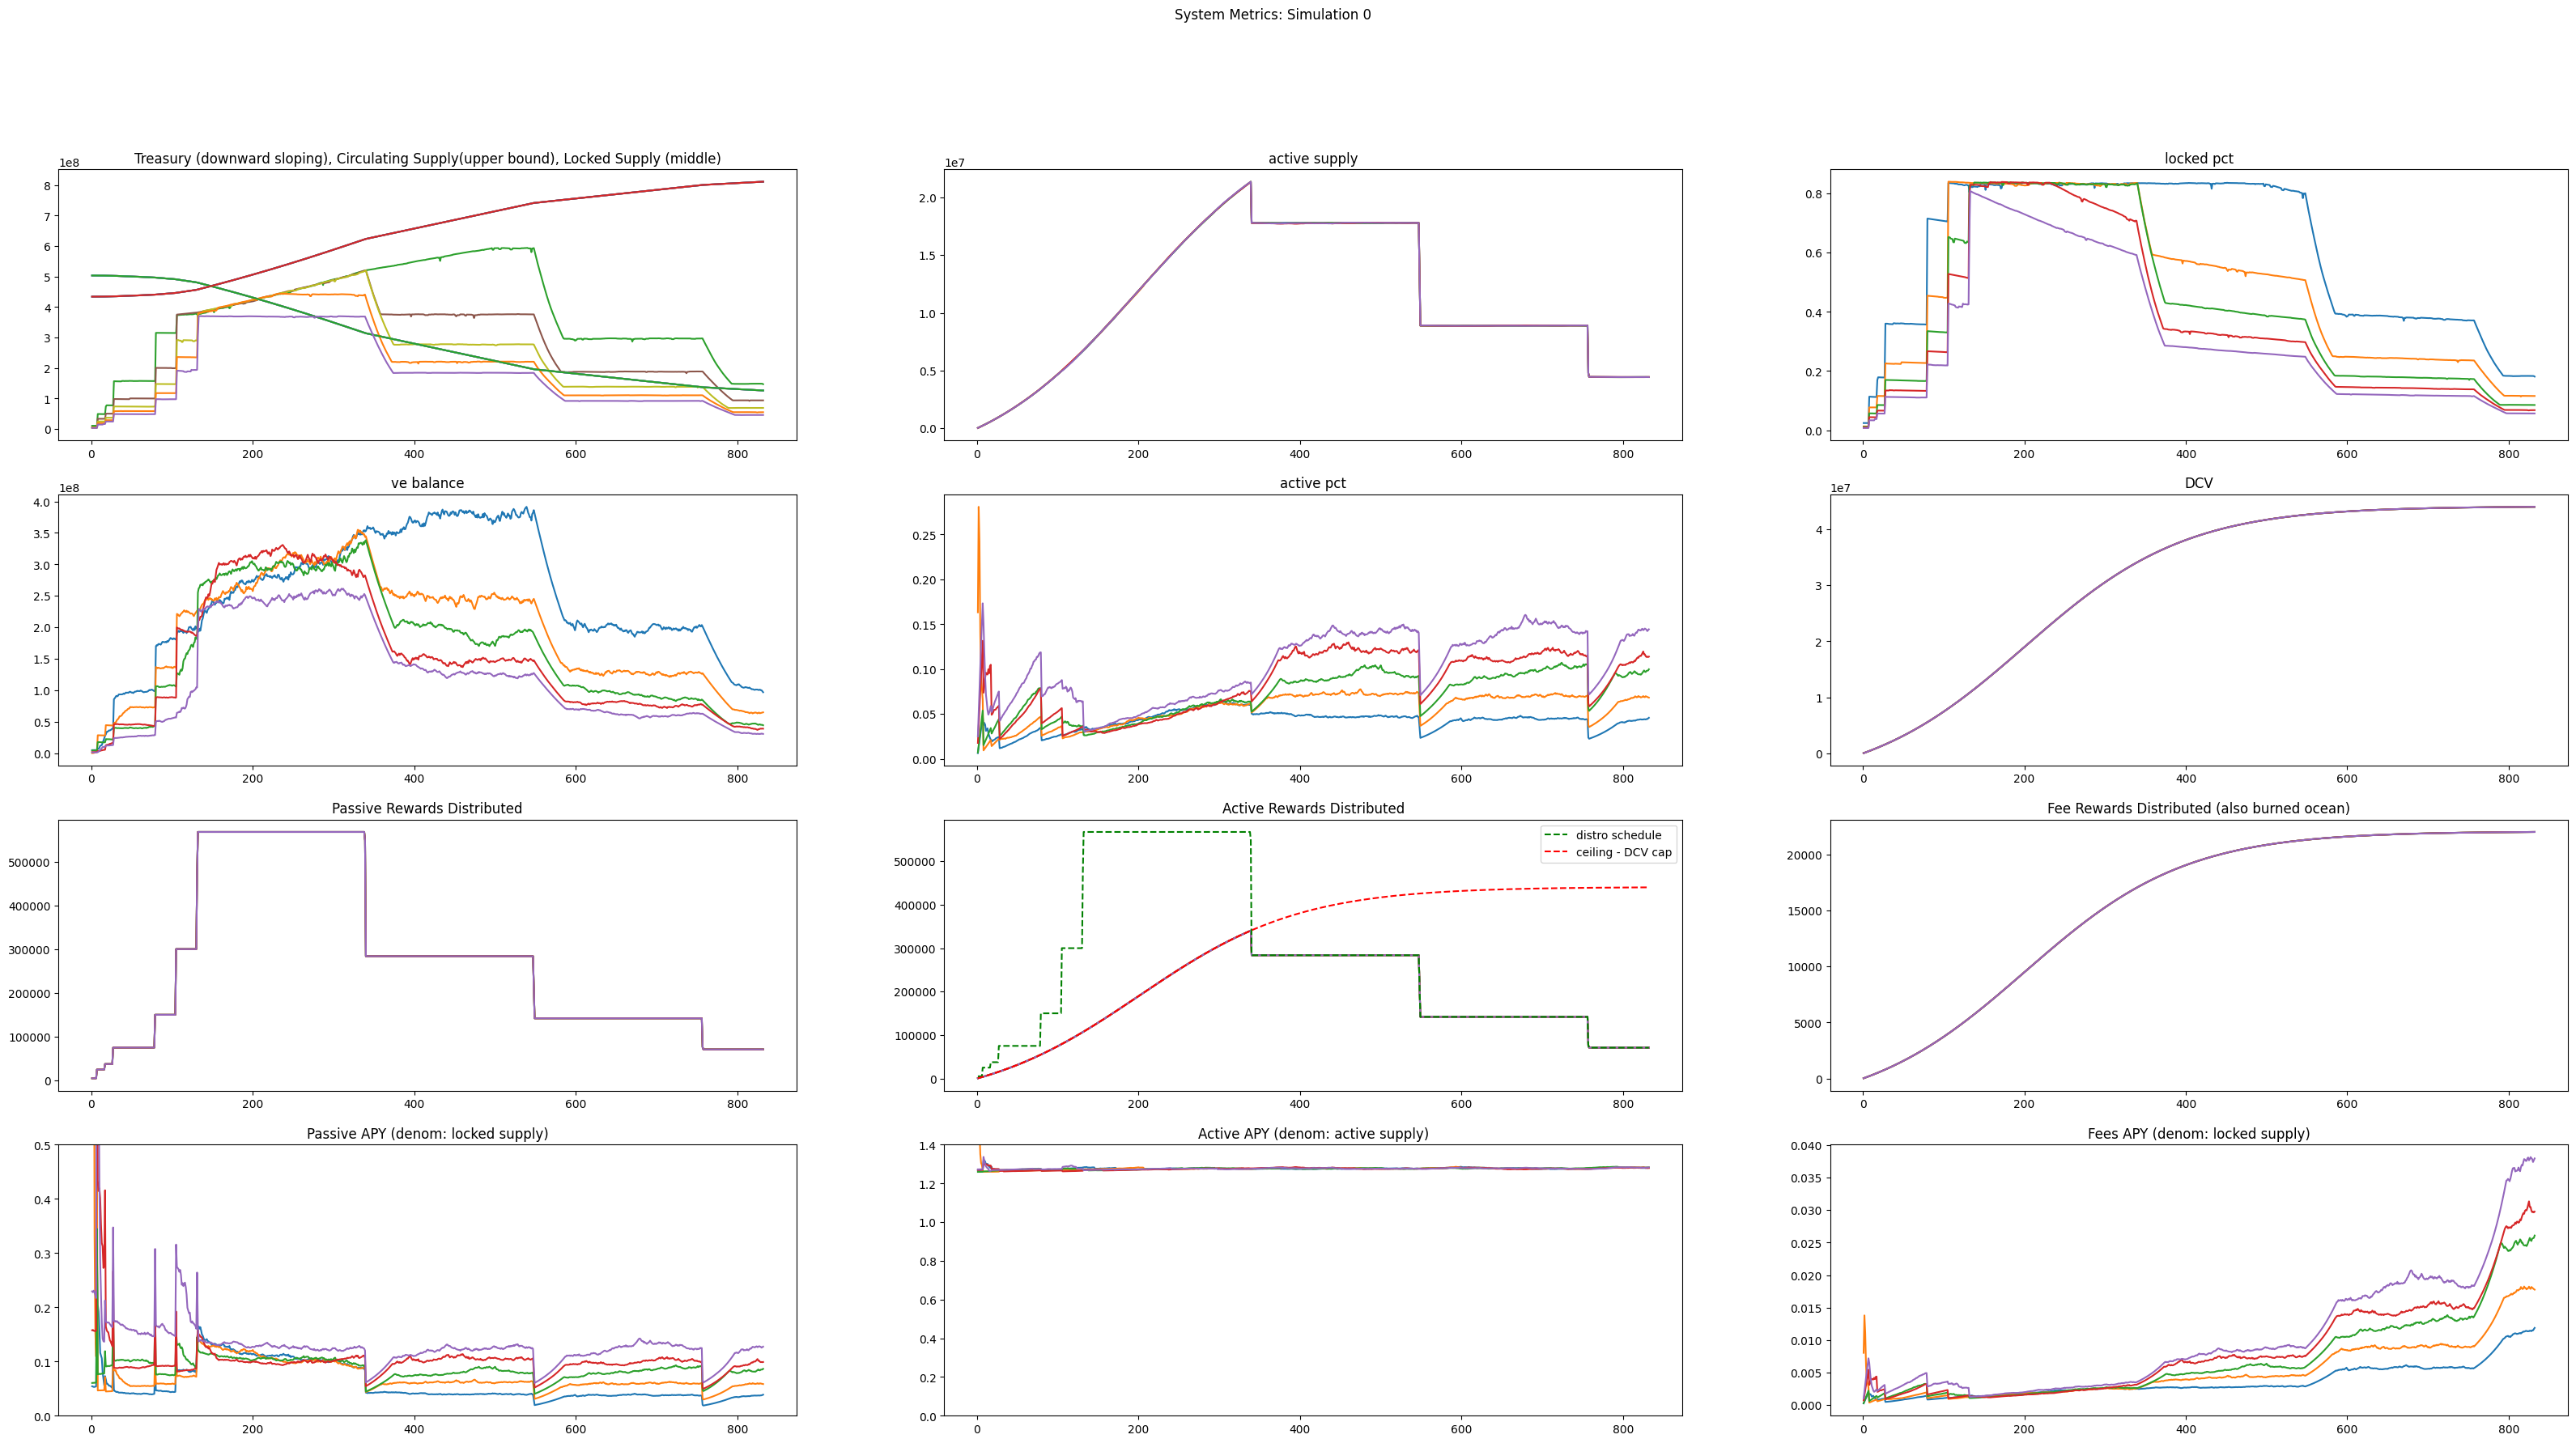

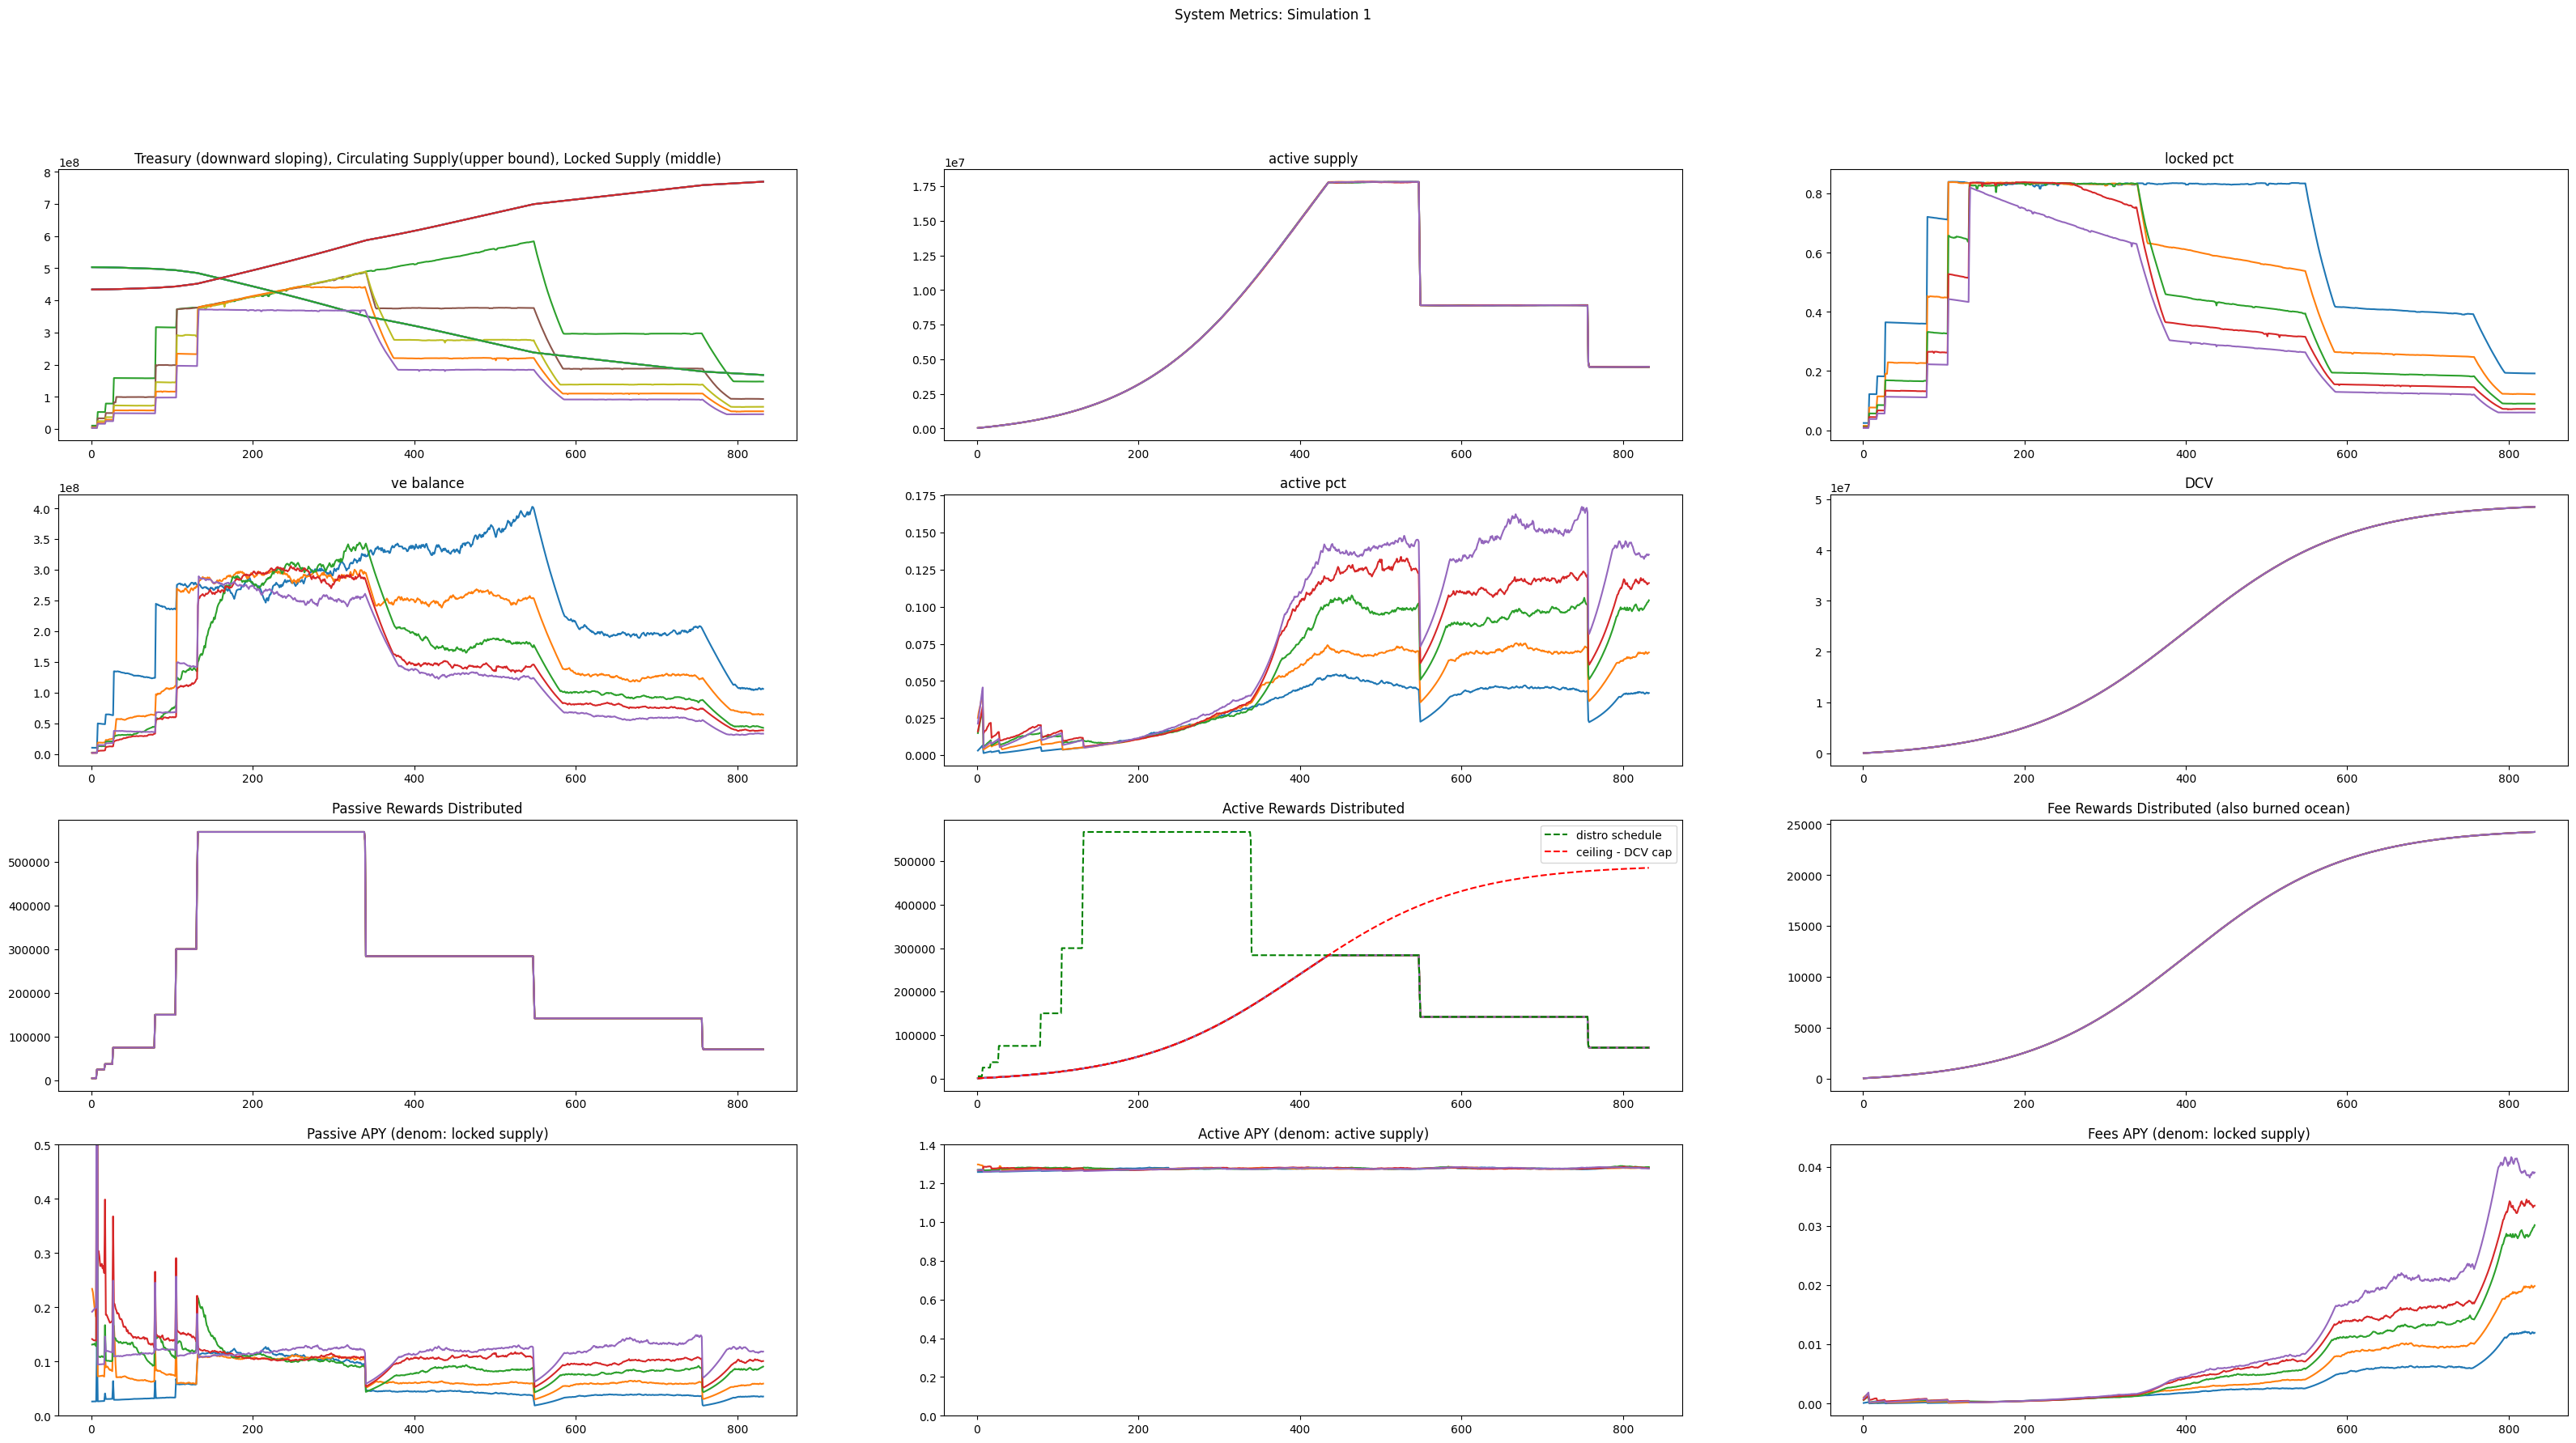

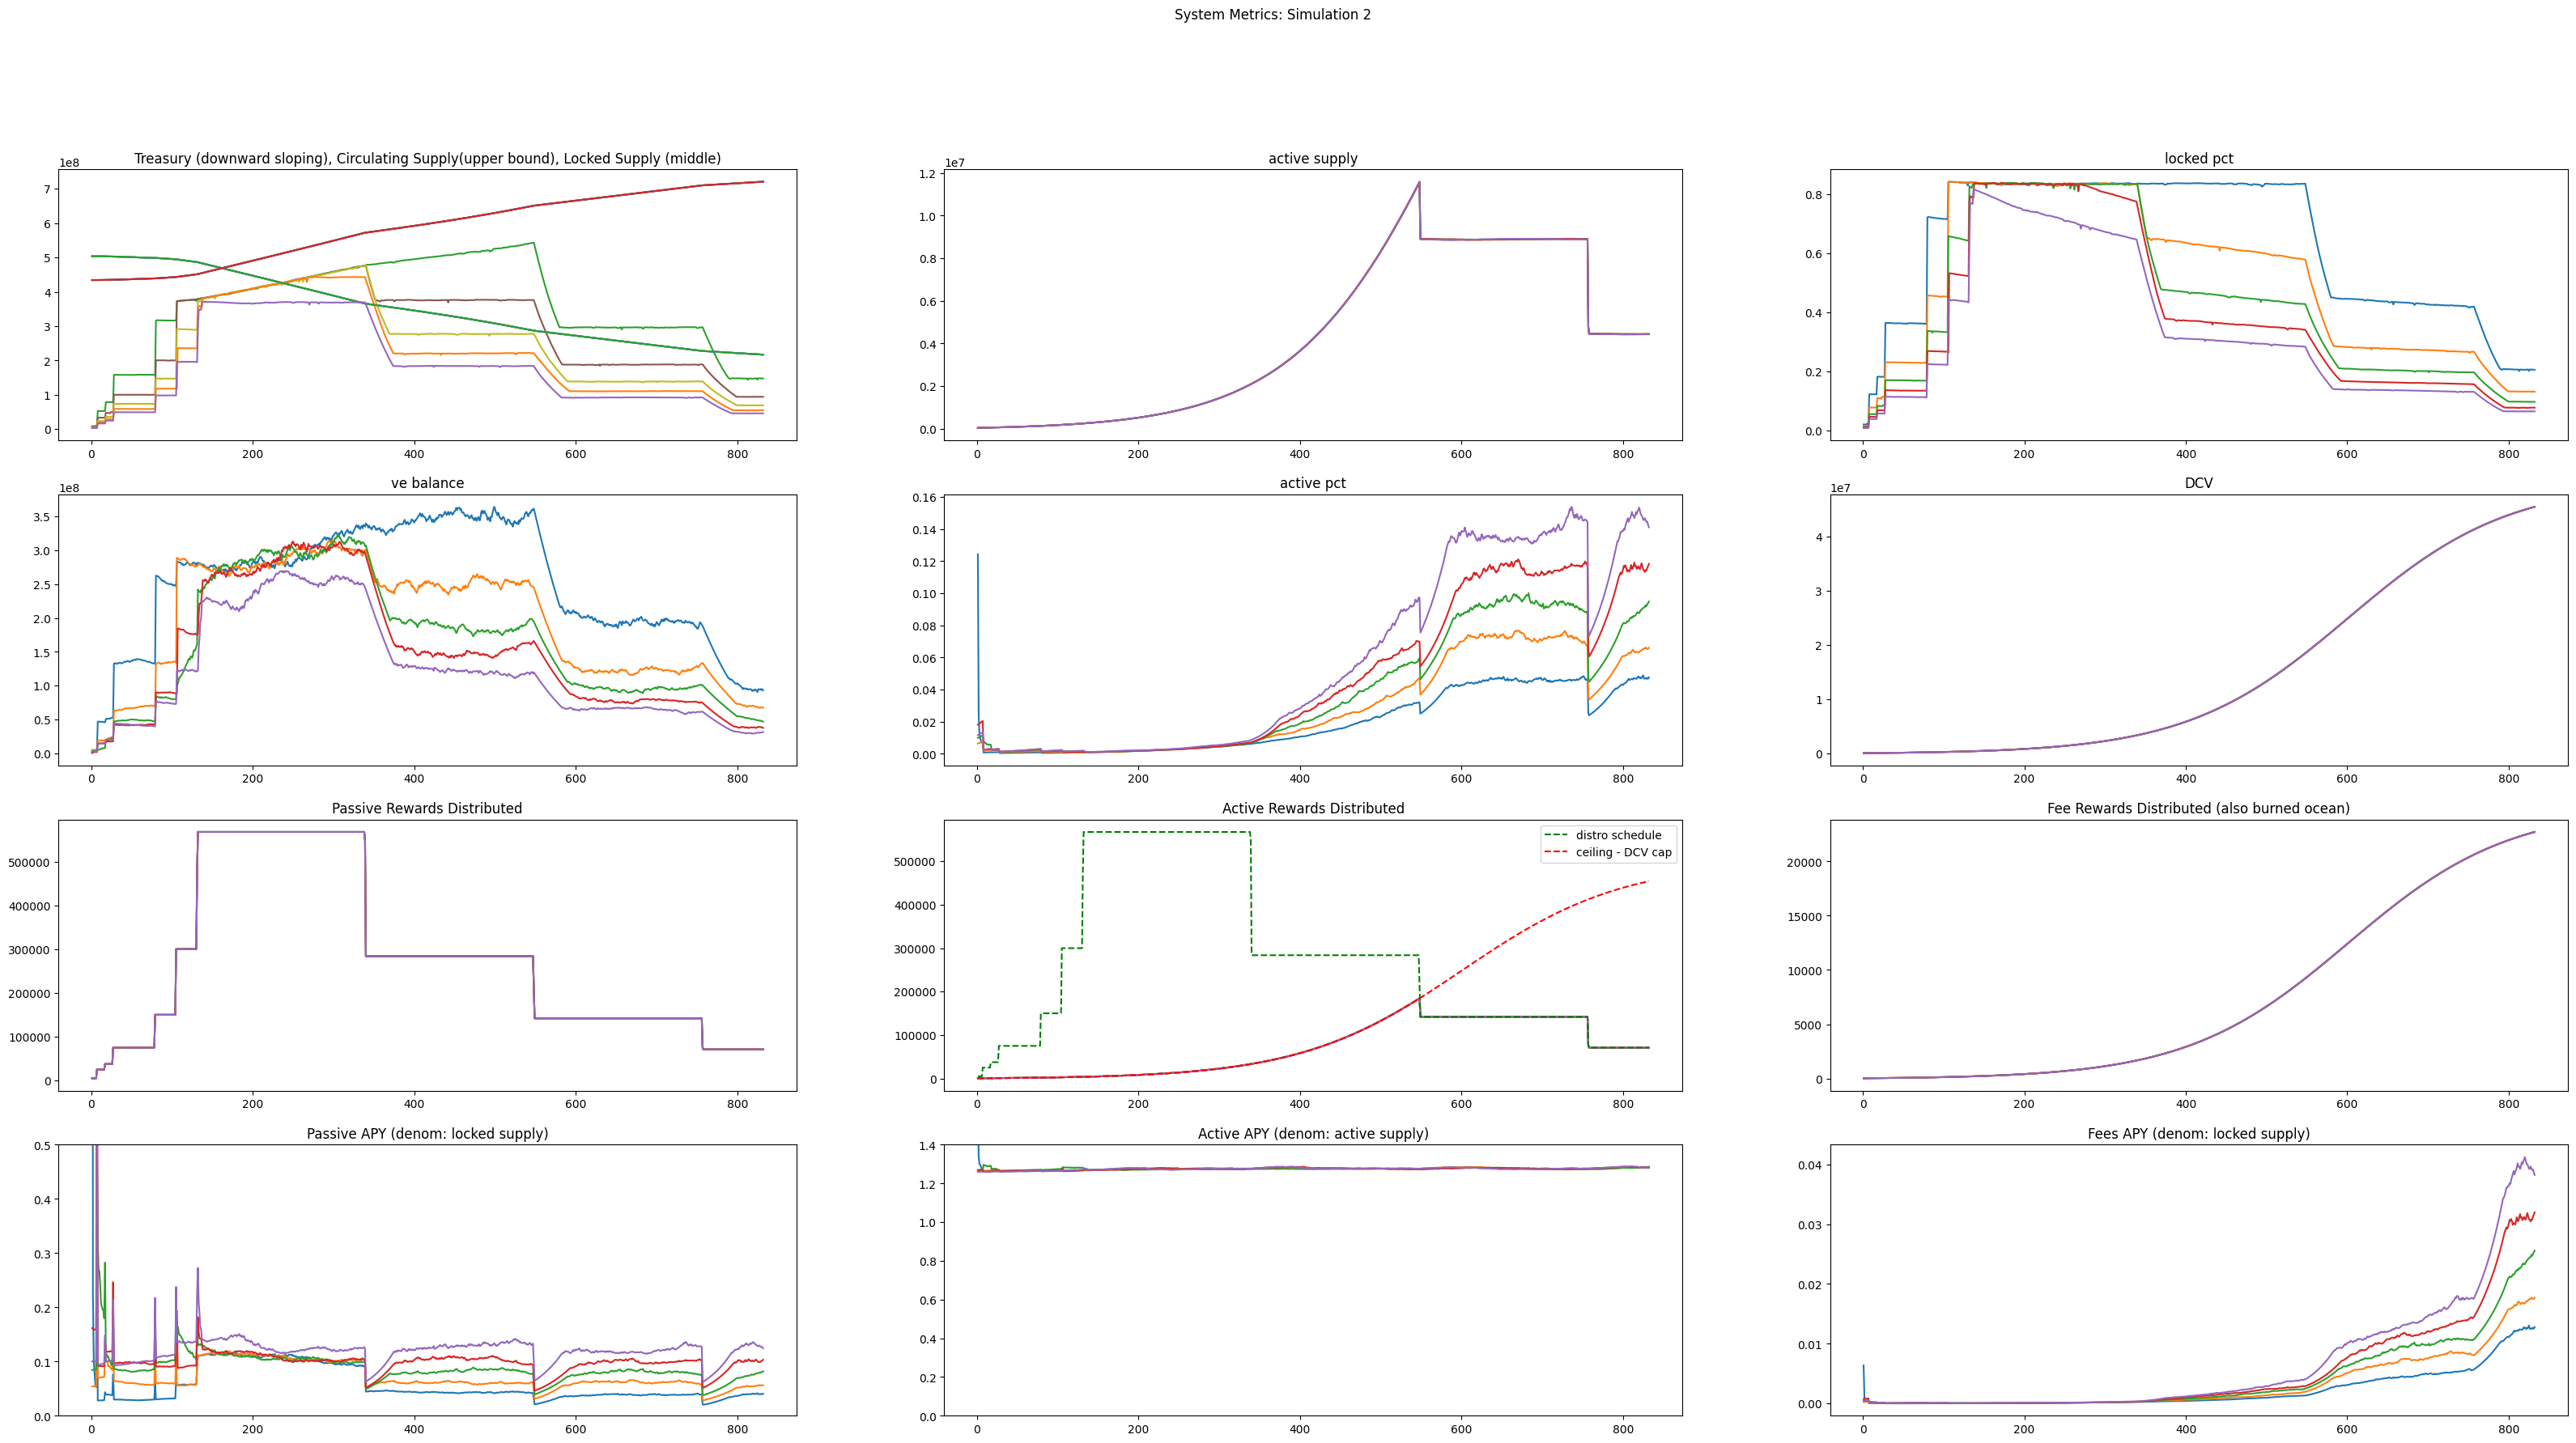

In [12]:
# plot monte carlo runs
for sim in range(0, max(df_p.simulation) + 1):
    df_tmp0 = df_p[df_p.simulation == sim]
    fig, ax = plt.subplots(4,3, figsize=(40,20))
    for run in range(1, max(df_p.run)+1):
        df_tmp = df_tmp0[df_tmp0.run == run]
        APY_caps = {1:'10%', 2:'15%', 3:'20%', 4:'25%', 5:'30%'}
    #for subset in range(0, max(df_p.subset)+1):
    #    df_tmp = df_tmp0[df_tmp0.subset == subset]
    #for sim in range(0, max(df_p.simulation) + 1):
    #    df_tmp = df_tmp0[df_tmp0.simulation == sim]
        ax[0,0].plot(df_tmp.timestep, df_tmp.ocean_treasury)
        ax[0,0].plot(df_tmp.timestep, df_tmp.ocean_unlocked_supply + df_tmp.locked_supply)
        ax[0,0].plot(df_tmp.timestep, df_tmp.locked_supply)
        #ax[0,1].plot(df_tmp.timestep, df_tmp.ocean_unlocked_supply)
        ax[0,2].plot(df_tmp.timestep, df_tmp.pct_locked)
        ax[1,0].plot(df_tmp.timestep, df_tmp.ve_balance)
        # could plot avg lock duration??? # driver: locking behavior
        ax[1,1].plot(df_tmp.timestep, df_tmp.active_pct) # driver: voting behavior (uniform random)
        ax[0,1].plot(df_tmp.timestep, df_tmp.active_pct * df_tmp.ve_balance)
        # something for asset-level voting success / distribution # driver: voting behavior (uniform random)
        # x = sort by dataconsumevolume, y = pct of veocean allocated to asset
        ax[1,2].plot(df_tmp.timestep, df_tmp.dcv) # driver: DCV growth rate
        ax[2,0].plot(df_tmp.timestep, df_tmp.rewards_distributed_df_passive) # driver: distribution schedule
        ax[2,1].plot(df_tmp.timestep, df_tmp.rewards_distributed_df_active) # driver: distribution schedule & locking behavior & voting behavior (floor: 0% active or 0% voting success & middle: active_pct/voting success & asset-level success/distribution) & Rewards Function (ceiling: DCV*0.1 or 125%APY, therefore DCV growth rate)
        ax[2,2].plot(df_tmp.timestep, df_tmp.rewards_distributed_fees) # driver: DCV growth rate
        ax[3,0].plot(df_tmp.timestep, df_tmp.Passive_APY, label=f'{APY_caps[run]} APY target') #driver: distro schedule & locking behavior
        ax[3,1].plot(df_tmp.timestep, df_tmp.Active_APY) #driver: distro schedule & locking behavior & voting behavior(active pct & asset-level voting success)
        ax[3,2].plot(df_tmp.timestep, df_tmp.Fees_APY) #driver: DCV growth rate & locking behavior
        #ax[3,3].plot(df_tmp.timestep, df_tmp.Agg_APY)
    
    ax[2,1].plot(df_tmp0[df_tmp0.run == 1].timestep, df_tmp0[df_tmp0.run == 1].rewards_distributed_df_passive, label='distro schedule', color='green', linestyle='--')
    ax[2,1].plot(df_tmp0[df_tmp0.run == 1].timestep, df_tmp0[df_tmp0.run == 1].dcv * 0.01, label='ceiling - DCV cap', color='red', linestyle='--')
    #ax[2,1].plot(df_tmp0[df_tmp0.subset == 0].timestep, df_tmp0[df_tmp0.subset == 0].rewards_distributed_df_passive, label='distro schedule', color='green', linestyle='--')
    #ax[2,1].plot(df_tmp0[df_tmp0.subset == 0].timestep, df_tmp0[df_tmp0.subset == 0].dcv * 0.01, label='ceiling - DCV cap', color='red', linestyle='--')
    #for sim in range(0, max(df_p.simulation) + 1): 
    #    ax[2,1].plot(df_tmp0[df_tmp0.simulation == sim].timestep, df_tmp0[df_tmp0.simulation == sim].rewards_distributed_df_passive, label='distro schedule', color='green', linestyle='--')
    #    ax[2,1].plot(df_tmp0[df_tmp0.simulation == sim].timestep, df_tmp0[df_tmp0.simulation == sim].dcv * 0.01, label='ceiling - DCV cap', color='red', linestyle='--')
    
    
    ax[0,0].set_title('Treasury (downward sloping), Circulating Supply(upper bound), Locked Supply (middle)')
    ax[0,1].set_title('active supply')
    ax[0,2].set_title('locked pct')
    ax[1,0].set_title('ve balance')
    ax[1,1].set_title('active pct')
    #ax[1,2].set_title('something to show uniform random asset-level voting success / distribution')
    ax[1,2].set_title('DCV')
    ax[2,0].set_title('Passive Rewards Distributed')
    ax[2,1].set_title('Active Rewards Distributed')
    ax[2,2].set_title('Fee Rewards Distributed (also burned ocean)')
    ax[3,0].set_title('Passive APY (denom: locked supply)')
    ax[3,0].set_ylim(0,0.5)
    ax[3,1].set_ylim(0,1.4)
    ax[3,1].set_title('Active APY (denom: active supply)')
    ax[3,2].set_title('Fees APY (denom: locked supply)')
    #ax[3,3].set_title('Agg APY (denom: locked supply)')
    ax[2,1].legend()
    fig.suptitle(f"System Metrics: Simulation {sim}")
    plt.show()

In [15]:
# df for avg monte carlo plots (avg APYs across all runs)
df_avg_apy = df_p[['simulation', 'run', 'subset', 'timestep', 'rewards_distributed_df_passive', 'rewards_distributed_df_active', 'rewards_distributed_fees', 'locked_supply', 'active_pct', 've_balance']].reset_index(drop=True)
#df_avg_apy = df_avg_apy.groupby(['simulation', 'timestep']).mean().reset_index()
df_avg_apy = df_avg_apy.groupby(['simulation', 'run', 'timestep']).mean().reset_index()
#df_avg_apy = df_avg_apy.groupby(['subset', 'timestep']).mean().reset_index()
df_avg_apy['avg_Agg_rewards_distributed'] = df_avg_apy['rewards_distributed_df_passive'] + df_avg_apy['rewards_distributed_df_active'] + df_avg_apy['rewards_distributed_fees']
df_avg_apy['avg_Passive_APY'] = df_avg_apy.apply(lambda x: (1 + x['rewards_distributed_df_passive']/x['ve_balance']) ** 52 - 1 if x['ve_balance'] != 0 else 0, axis=1)
df_avg_apy['avg_Active_APY'] = df_avg_apy.apply(lambda x: (1 + x['rewards_distributed_df_active']/(x['active_pct']*x['ve_balance'])) ** 52 - 1 if x['ve_balance'] != 0 and x['active_pct'] != 0 else 0, axis=1)
df_avg_apy['avg_Fees_APY'] = df_avg_apy.apply(lambda x: (1 + x['rewards_distributed_fees']/x['ve_balance']) ** 52 - 1 if x['ve_balance'] != 0 else 0, axis=1)
#df_avg_apy['avg_Agg_APY'] = df_avg_apy.apply(lambda x: (1 + (x['rewards_distributed_df_passive'] + x['rewards_distributed_df_active'] + x['rewards_distributed_fees'])/x['ve_balance']) ** 52 - 1 if x['ve_balance'] != 0 else 0, axis=1)
#df_avg_apy['avg_Agg_APY'] = df_avg_apy.apply(lambda x: ((1 + (x['rewards_distributed_df_passive'] + x['rewards_distributed_fees'])/x['ve_balance']) ** 52 - 1) + x['avg_Active_APY']*x['active_pct'] if x['ve_balance'] != 0 else 0, axis=1)
df_avg_apy['avg_Agg_APY'] = df_avg_apy.apply(lambda x: (x['avg_Passive_APY'] + x['avg_Fees_APY'] + x['avg_Active_APY']*x['active_pct']), axis=1)


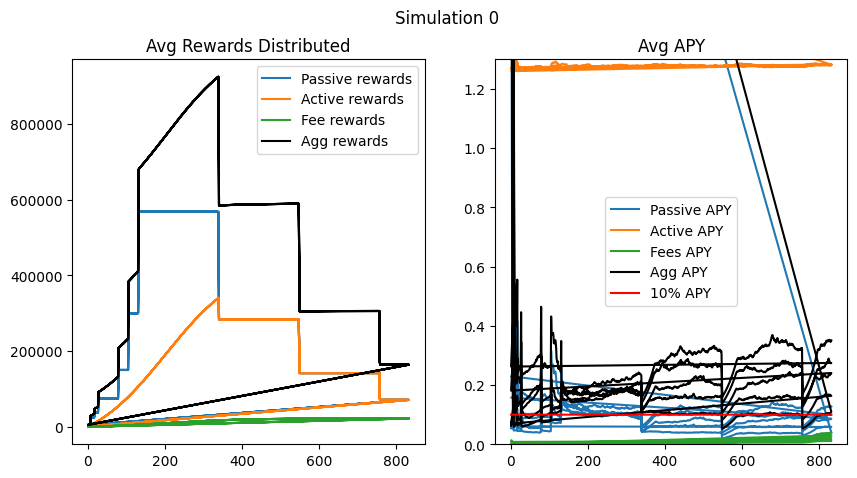

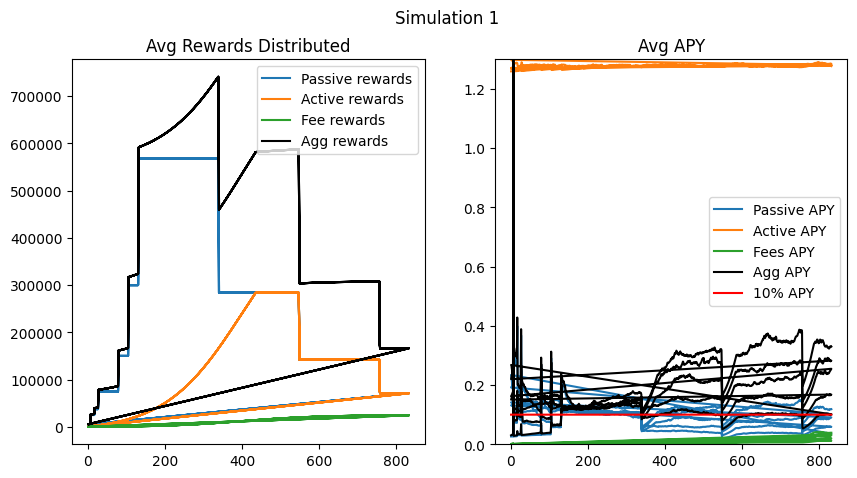

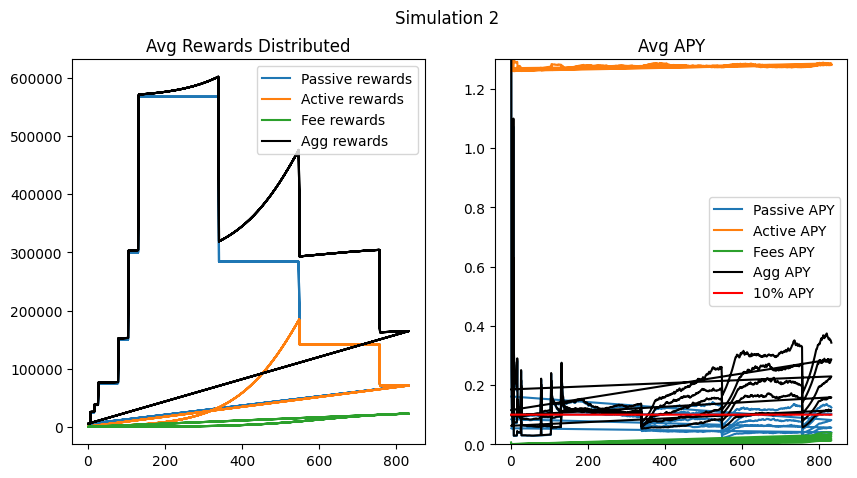

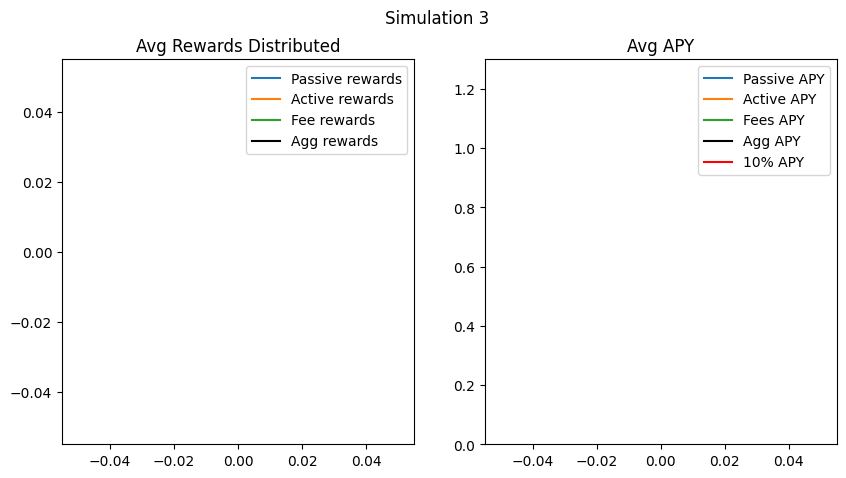

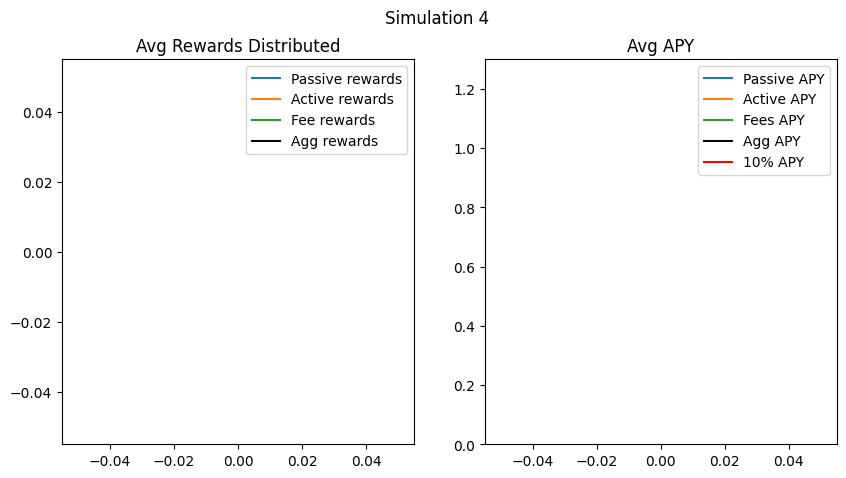

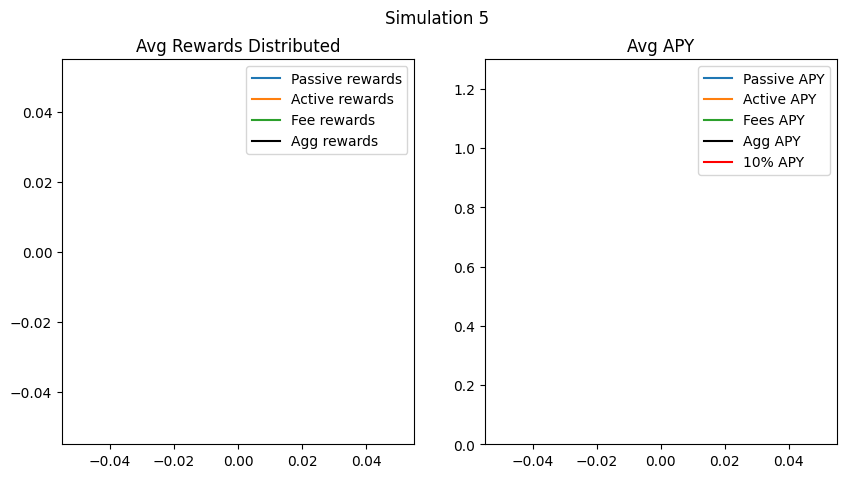

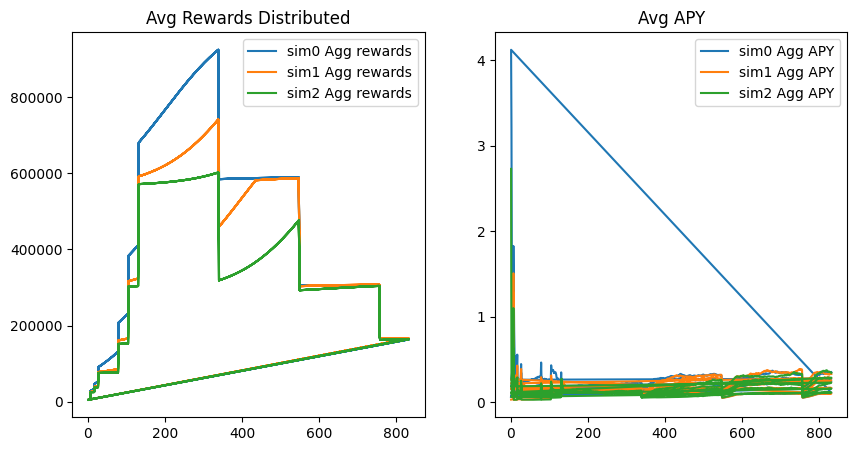

In [16]:
def f(x):
    return x-x+0.1 

weeks = 4

for sim in range(0, max(df_p.simulation) + 1):
    df_tmp = df_avg_apy[df_avg_apy.simulation == sim]
#for subset in range(0, max(df_p.subset)+1):
#    df_tmp = df_avg_apy[df_avg_apy.subset == subset]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    #ax[0].plot(df_avg_apy.timestep, df_avg_apy.locked_supply, label='Locked Supply')
    ax[0].plot(df_tmp.timestep, df_tmp.rewards_distributed_df_passive, label='Passive rewards')
    ax[0].plot(df_tmp.timestep, df_tmp.rewards_distributed_df_active, label='Active rewards')
    #ax[0].plot(df_tmp.timestep, get_rolling_avg(df_tmp.rewards_distributed_df_active, weeks), label='1m avg - Active rewards')
    ax[0].plot(df_tmp.timestep, df_tmp.rewards_distributed_fees, label='Fee rewards')
    ax[0].plot(df_tmp.timestep, df_tmp.avg_Agg_rewards_distributed, label='Agg rewards', color='black')
    ax[1].plot(df_tmp.timestep, df_tmp.avg_Passive_APY, label='Passive APY')
    ax[1].plot(df_tmp.timestep, df_tmp.avg_Active_APY, label='Active APY')
    #ax[1].plot(df_tmp.timestep, get_rolling_avg(df_tmp.avg_Active_APY, weeks), label='1m avg - Active APY')
    ax[1].plot(df_tmp.timestep, df_tmp.avg_Fees_APY, label='Fees APY')
    ax[1].plot(df_tmp.timestep, df_tmp.avg_Agg_APY, label='Agg APY', color='black')
    ax[1].plot(df_tmp.timestep, f(df_tmp.timestep), label='10% APY', color='red')
    ax[0].set_title('Avg Rewards Distributed')
    ax[1].set_title('Avg APY')
    ax[1].set_ylim(0,1.3)
    ax[0].legend()
    ax[1].legend()
    fig.suptitle(f"Simulation {sim}")
    plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,5))
for sim in range(0, max(df_p.simulation) + 1):
    df_tmp = df_avg_apy[df_avg_apy.simulation == sim]
#for subset in range(0, max(df_p.subset)+1):
#    df_tmp = df_avg_apy[df_avg_apy.subset == subset]
    ax[0].plot(df_tmp.timestep, df_tmp.avg_Agg_rewards_distributed, label=f'sim{sim} Agg rewards')
    ax[1].plot(df_tmp.timestep, df_tmp.avg_Agg_APY, label=f'sim{sim} Agg APY')
ax[0].set_title('Avg Rewards Distributed')
ax[1].set_title('Avg APY')
ax[0].legend()
ax[1].legend()
plt.show()
